Importing required packages

In [1]:
import pyodbc
import pandas as pd
from pandas_profiling import ProfileReport

Connecting to SQL Server through Python ODBC Connector

In [2]:
mycon = pyodbc.connect('DRIVER={SQL Server};Server=.\SQLEXPRESS;Database=MyDataBase;Trusted_Connection=yes')

Collecting sales data from SQL Server Database, using the tables customers, products and sales details

In [3]:
mySentence="""SELECT tblAC_Cliente.Estado AS State, tblIC_Producto.Clave_Categoria_Sub_1 AS Category, tblAO_SalidaSub.Precio_Extendido AS Sales, Year(tblAO_SalidaMain.Fecha) as [Year]
    FROM tblAC_Cliente RIGHT OUTER JOIN
    tblIC_Producto RIGHT OUTER JOIN 
    tblAO_SalidaSub ON tblIC_Producto.Clave_Producto = tblAO_SalidaSub.Clave_Producto LEFT OUTER JOIN
    tblAO_SalidaMain ON tblAO_SalidaSub.Folio_Salida = tblAO_SalidaMain.Folio_Salida AND tblAO_SalidaSub.Clave_Almacen = tblAO_SalidaMain.Clave_Almacen ON 
    tblAC_Cliente.Clave_Cliente = tblAO_SalidaMain.Clave_Cliente
    WHERE (tblAC_Cliente.Clave_Cliente <> '*AJ*')"""
MyData = pd.read_sql(mySentence,mycon)
MyData.head()

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,State,Category,Sales,Year
0,NUEVO LEON,Support,2100.0,2013
1,QUERETARO,Development,4200.0,2013
2,CIUDAD DE MEXICO,Support,3800.0,2013
3,GUANAJUATO,Support,1200.0,2013
4,COAHUILA,Support,1200.0,2013


Exporting data frame to a csv file

In [4]:
MyData.to_csv('C:\_DataFiles\sales.csv')

Getting the basic statistics from the dataframe

In [5]:
MyData.describe()

,Sales,Year
count,1341.000000,1341.000000
mean,3717.123840,2017.667412
std,4896.061344,2.704566
min,85.000000,2013.000000
25%,1400.000000,2016.000000
50%,2100.000000,2018.000000
75%,4125.000000,2020.000000
max,70400.000000,2022.000000


Getting information about data type of the dataframe columns

In [6]:
MyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     1341 non-null   object 
 1   Category  1341 non-null   object 
 2   Sales     1341 non-null   float64
 3   Year      1341 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 42.0+ KB


Getting the max values of each column in the dataframe

In [7]:
MyData.max()

State        YUCATAN
Category    Training
Sales        70400.0
Year            2022
dtype: object

Business Question #1 - Show the sales by year in order to know the company's sales through the time

<AxesSubplot:title={'center':'Sales by year'}, xlabel='Year'>

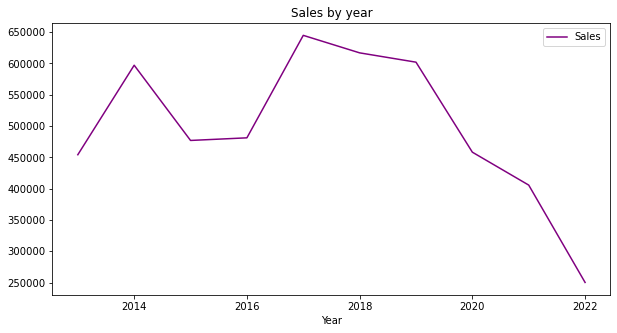

In [4]:
MyData.groupby('Year')['Sales'].sum().plot(kind='line',legend='Reverse',color='purple',figsize=(10,5),title='Sales by year')

Business Question #2 - Show the sales by state in order to know the state with the highest sales

<AxesSubplot:title={'center':'Sales by State'}, ylabel='State'>

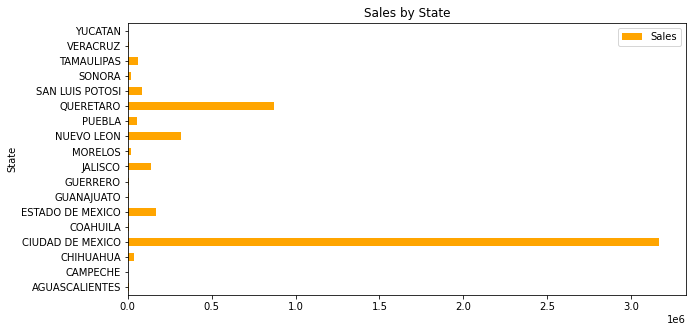

In [15]:
MyData.groupby('State')['Sales'].sum().plot(kind='barh',legend='Reverse',color='orange',figsize=(10,5),title='Sales by State')

Business Question #3 - Show the sales by category in order to know the most profitable category

<AxesSubplot:title={'center':'Sales by Category'}, ylabel='Category'>

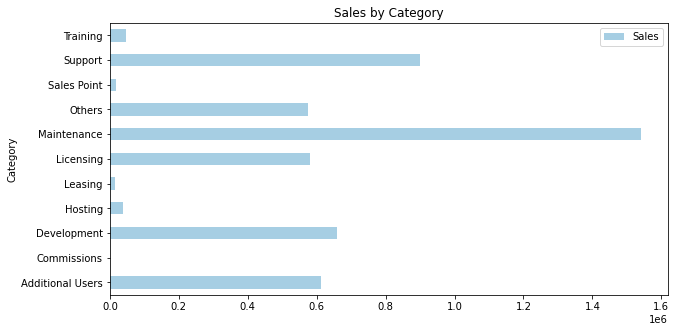

In [16]:
MyData.groupby('Category')['Sales'].sum().plot(kind='barh',legend='Reverse',cmap='Paired',figsize=(10,5),title='Sales by Category')

Using pandas profilereport to get an HTML file with some statistics

In [13]:
MyData.shape
prof = ProfileReport(MyData)
prof.to_file(output_file='C:\_DataFiles\SalesInsights.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]